# 1. Import Packages

In [1]:
# Code to install packages used. Uncomment to install.

!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 5.5 MB/s eta 0:00:00


In [1]:
# Data visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Time, for time metrics
from time import time

# Model and preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report


# 2. Read Data

In [5]:
student_df = pd.read_csv('./home/raedin/Desktop/Academic/DCIT 307 Mini-Project/StudentSuccessAI/student-data.csv', delimiter=',', encoding="utf-8-sig")

FileNotFoundError: [Errno 2] No such file or directory: './home/raedin/Desktop/Academic/DCIT 307 Mini-Project/StudentSuccessAI/student-data.csv'

In [4]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [5]:
student_df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


# 3. Data Processing

## 3.1 Feature Encoding

In [85]:
# Import encoding functions
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder


In [86]:
# # Categorical features
# categ = ['school', 'sex', 'address', 'famsize','Pstatus', 'Mjob',
#         'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
#         'activities', 'nursery', 'higher', 'internet', 'romantic']

In [112]:
# # Using mapping function
# def map_encode():
#     map_df = pd.DataFrame()
#     map_df['school'] = student_df['school'].map({'GP': 0, 'MS': 1})
#     map_df['sex'] = student_df['sex'].map({'M': 0, 'F': 1})
#     map_df['address'] = student_df['address'].map({'U': 0, 'R': 1})
#     map_df['famsize'] = student_df['famsize'].map({'LE3': 0, 'GT3': 1})
#     map_df['Pstatus'] = student_df['Pstatus'].map({'T': 0, 'A': 1})
#     map_df['Mjob'] = student_df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
#     map_df['Fjob'] = student_df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
#     map_df['reason'] = student_df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
#     map_df['guardian'] = student_df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
#     map_df['schoolsup'] = student_df['schoolsup'].map({'no': 0, 'yes': 1})
#     map_df['famsup'] = student_df['famsup'].map({'no': 0, 'yes': 1})
#     map_df['paid'] = student_df['paid'].map({'no': 0, 'yes': 1})
#     map_df['activities'] = student_df['activities'].map({'no': 0, 'yes': 1})
#     map_df['nursery'] = student_df['nursery'].map({'no': 0, 'yes': 1})
#     map_df['higher'] = student_df['higher'].map({'no': 0, 'yes': 1})
#     map_df['internet'] = student_df['internet'].map({'no': 0, 'yes': 1})
#     map_df['romantic'] = student_df['romantic'].map({'no': 0, 'yes' : 1})
#     map_df['passed'] = student_df['passed'].map({'no': 0, 'yes': 1})

#     # Concantenate original dataframe
#     for col in student_df:
#       if col != 'passed' and col not in map_df.columns:
#         map_df[col] = student_df[col]    
#     # map_df['passed'] = map_df.pop('passed')

#     return map_df

# # def map_encode():
# #     map_df = pd.DataFrame()
# #     map_df['school'] = pd.to_numeric(student_df['school'].map({'GP': 0, 'MS': 1}))
# #     map_df['sex'] = pd.to_numeric(student_df['sex'].map({'M': 0, 'F': 1}))
# #     map_df['address'] = pd.to_numeric(student_df['address'].map({'U': 0, 'R': 1}))
# #     map_df['famsize'] = pd.to_numeric(student_df['famsize'].map({'LE3': 0, 'GT3': 1}))
# #     map_df['Pstatus'] = pd.to_numeric(student_df['Pstatus'].map({'T': 0, 'A': 1}))
# #     map_df['Mjob'] = pd.to_numeric(student_df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}))
# #     map_df['Fjob'] = pd.to_numeric(student_df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}))
# #     map_df['reason'] = pd.to_numeric(student_df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3}))
# #     map_df['guardian'] = pd.to_numeric(student_df['guardian'].map({'mother': 0, 'father': 1, 'other': 2}))
# #     map_df['schoolsup'] = pd.to_numeric(student_df['schoolsup'].map({'no': 0, 'yes': 1}))
# #     map_df['famsup'] = pd.to_numeric(student_df['famsup'].map({'no': 0, 'yes': 1}))
# #     map_df['paid'] = pd.to_numeric(student_df['paid'].map({'no': 0, 'yes': 1}))
# #     map_df['activities'] = pd.to_numeric(student_df['activities'].map({'no': 0, 'yes': 1}))
# #     map_df['nursery'] = pd.to_numeric(student_df['nursery'].map({'no': 0, 'yes': 1}))
# #     map_df['higher'] = pd.to_numeric(student_df['higher'].map({'no': 0, 'yes': 1}))
# #     map_df['internet'] = pd.to_numeric(student_df['internet'].map({'no': 0, 'yes': 1}))
# #     map_df['romantic'] = pd.to_numeric(student_df['romantic'].map({'no': 0, 'yes' : 1}))
# #     map_df['passed'] = pd.to_numeric(student_df['passed'].map({'no': 0, 'yes': 1}))

# #     # Concatenate original dataframe
# #     for col in student_df:
# #         if col != 'passed' and col not in map_df.columns:
# #             map_df[col] = pd.to_numeric(student_df[col])

# #     return map_df


In [88]:
# map_encode()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,...,2,0,4,3,4,1,1,3,6,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,...,2,0,5,3,3,1,1,3,4,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,...,2,3,4,3,2,2,3,3,10,yes
3,GP,F,U,GT3,T,health,services,home,mother,no,...,3,0,3,2,2,1,1,5,2,yes
4,GP,F,U,GT3,T,other,other,home,father,no,...,2,0,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,...,2,2,5,5,4,4,5,4,11,no
391,MS,M,U,LE3,T,services,services,course,mother,no,...,1,0,2,4,5,3,4,2,3,yes
392,MS,M,R,GT3,T,other,other,course,other,no,...,1,3,5,5,3,3,3,3,3,no
393,MS,M,R,LE3,T,services,other,course,mother,no,...,1,0,4,4,1,3,4,5,0,yes


In [89]:
# Using label encoder
lenc = LabelEncoder()
def label_encode():
    lenc_df = pd.DataFrame()

    for col in categ:
        student_df[col] = lenc.fit_transform(student_df[col])
    lenc_df = student_df

    return lenc_df

In [90]:
label_encode()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,no
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,no
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,yes
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,yes
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,0,5,5,4,4,5,4,11,no
391,1,1,17,1,1,1,3,1,3,3,...,1,0,2,4,5,3,4,2,3,yes
392,1,1,21,0,0,1,1,1,2,2,...,0,0,5,5,3,3,3,3,3,no
393,1,1,18,0,1,1,3,2,3,2,...,1,0,4,4,1,3,4,5,0,yes


In [91]:
# # Using binary encoder
# benc = ce.BinaryEncoder(cols=categ)

# def binary_encode():
#   benc.fit(student_df)
#   benc_df = benc.transform(student_df)

#   return benc_df


In [92]:
# binary_encode()

,school_0,school_1,sex_0,sex_1,age,address_0,address_1,famsize_0,famsize_1,Pstatus_0,...,romantic_0,romantic_1,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,1,0,1,18,0,1,0,1,0,...,0,1,4,3,4,1,1,3,6,no
1,0,1,0,1,17,0,1,0,1,1,...,0,1,5,3,3,1,1,3,4,no
2,0,1,0,1,15,0,1,1,0,1,...,0,1,4,3,2,2,3,3,10,yes
3,0,1,0,1,15,0,1,0,1,1,...,1,0,3,2,2,1,1,5,2,yes
4,0,1,0,1,16,0,1,0,1,1,...,0,1,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,1,0,20,0,1,1,0,0,...,0,1,5,5,4,4,5,4,11,no
391,1,0,1,0,17,0,1,1,0,1,...,0,1,2,4,5,3,4,2,3,yes
392,1,0,1,0,21,1,0,0,1,1,...,0,1,5,5,3,3,3,3,3,no
393,1,0,1,0,18,1,0,1,0,1,...,0,1,4,4,1,3,4,5,0,yes


In [93]:
# # Using one-hot encoder

# def one_hot_encode():
#   oht = OneHotEncoder()

#   encoded_features = oht.fit_transform(student_df[categ])
#   henc_df = pd.DataFrame(encoded_features.toarray(), columns = oht.get_feature_names_out(categ))

#   for col in student_df:
#       if col != categ:
#         henc_df[col] = student_df[col]    

#   return henc_df


In [94]:
# one_hot_encode()

,school_0,school_1,sex_0,sex_1,address_0,address_1,famsize_0,famsize_1,Pstatus_0,Pstatus_1,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,4,3,4,1,1,3,6,no
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1,0,5,3,3,1,1,3,4,no
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,4,3,2,2,3,3,10,yes
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1,1,3,2,2,1,1,5,2,yes
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,5,5,4,4,5,4,11,no
391,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,2,4,5,3,4,2,3,yes
392,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,5,5,3,3,3,3,3,no
393,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0,4,4,1,3,4,5,0,yes


## 3.2 Feature Scaling

In [95]:
# from sklearn.preprocessing import RobustScaler

# def scale_robust(df):
#     target = df.pop('passed')
#     scaled_df = pd.DataFrame()
    
#     # Create a RobustScaler object
#     scaler = RobustScaler()

#     # Scale the features and add them to the new DataFrame
#     for col in df.columns:
#       scaled_col = scaler.fit_transform(df[[col]])
#       scaled_df[col] = scaled_col.reshape(-1,)
#     scaled_df['passed'] = target

#     return scaled_df 

In [116]:
# # # feature scaling will allow the algorithm to converge faster, large data will have same scal
# # def feature_scaling(df):
# #     for i in df:
# #         col = df[i]
# #         # let's choose columns that have large values
# #         if(np.max(col)>6):
# #             Max = max(col)
# #             Min = min(col)
# #             mean = np.mean(col)
# #             col  = (col-mean)/(Max)
# #             df[i] = col
# #         elif(np.max(col)<6):
# #             col = (col-np.min(col))
# #             col /= np.max(col)
# #             df[i] = col

# #     return df

# def feature_scaling(df):
#     for i in df:
#         col = df[i]
#         if(np.max(col)>6):
#             print(f"Processing column: {i}")
#             print(f"Minimum value: {np.min(col)}")
#             print(f"Maximum value: {np.max(col)}")
#             Max = max(col)
#             Min = min(col)
#             mean = np.mean(col)
#             print(f"Calculated mean: {mean}")
#             col  = (col-mean)/(Max)
#             df[i] = col
#         elif(np.max(col)<6):
#             col = (col-np.min(col))
#             col /= np.max(col)
#             df[i] = col

#     return df


In [97]:
# benc_df = binary_encode()
# lenc_df = label_encode()
# map_df = map_encode()
# henc_df = one_hot_encode()

# benc_df = scale_robust(benc_df)
# lenc_df = scale_robust(lenc_df)
# map_df = scale_robust(map_df)
# henc_df = scale_robust(henc_df)

# benc_df.to_csv('clean_b.csv', index=False)
# lenc_df.to_csv('clean_l.csv', index=False)
# map_df.to_csv('clean_m.csv', index=False)
# henc_df.to_csv('clean_h.csv', index=False)

In [117]:
# benc_df = binary_encode()
# lenc_df = label_encode()
# map_df = map_encode()
# henc_df = one_hot_encode()

# benc_df = feature_scaling(benc_df)
# lenc_df = feature_scaling(lenc_df)
# map_df = feature_scaling(map_df)
# henc_df = feature_scaling(henc_df)

Processing column: age
Minimum value: 15
Maximum value: 22
Calculated mean: 16.696202531645568
Processing column: absences
Minimum value: 0
Maximum value: 75
Calculated mean: 5.708860759493671


In [118]:
# lenc_df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.333333,0.333333,0.000000,0.75,0.50,0.75,0.00,0.00,0.50,0.003882
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.333333,0.000000,1.00,0.50,0.50,0.00,0.00,0.50,-0.022785
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.333333,1.000000,0.75,0.50,0.25,0.25,0.50,0.50,0.057215
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.666667,0.000000,0.50,0.25,0.25,0.00,0.00,1.00,-0.049451
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.00,0.25,1.00,-0.022785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.333333,0.666667,1.00,1.00,0.75,0.75,1.00,0.75,0.070549
391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.333333,0.000000,0.000000,0.25,0.75,1.00,0.50,0.75,0.25,-0.036118
392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,1.00,1.00,0.50,0.50,0.50,0.50,-0.036118
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.666667,0.000000,0.000000,0.75,0.75,0.00,0.50,0.75,1.00,-0.076118


# 3-2 Preprocessing(Again)

In [6]:
# Import encoding functions
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

In [10]:
# Using label encoder
lenc = LabelEncoder()
def label_encode():
    lenc_df = pd.DataFrame()

    for col in categ:
        student_df[col] = lenc.fit_transform(student_df[col])
    lenc_df = student_df

    return lenc_df

In [11]:
lenc_df = label_encode()

In [12]:
# # feature scaling will allow the algorithm to converge faster, large data will have same scal
# def feature_scaling(df):
#     for i in df:
#         col = df[i]
#         # let's choose columns that have large values
#         if(np.max(col)>6):
#             Max = max(col)
#             Min = min(col)
#             mean = np.mean(col)
#             col  = (col-mean)/(Max)
#             df[i] = col
#         elif(np.max(col)<6):
#             col = (col-np.min(col))
#             col /= np.max(col)
#             df[i] = col

#     return df

def feature_scaling(df):
    for i in df:
        col = df[i]
        if(np.max(col)>6):
            print(f"Processing column: {i}")
            print(f"Minimum value: {np.min(col)}")
            print(f"Maximum value: {np.max(col)}")
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            print(f"Calculated mean: {mean}")
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

    return df


In [13]:
lenc_df = feature_scaling(lenc_df)


Processing column: age
Minimum value: 15
Maximum value: 22
Calculated mean: 16.696202531645568
Processing column: absences
Minimum value: 0
Maximum value: 75
Calculated mean: 5.708860759493671


In [14]:
lenc_df

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0.0,1.0,0.0,1.0,1.0,0.75,0.00,0.666667,0.0,1.0,...,0.333333,0.000000,0.75,0.50,0.75,0.00,0.00,0.50,0.003882,0.0
1,0.0,1.0,0.0,1.0,0.0,0.75,1.00,0.666667,0.5,0.0,...,0.333333,0.000000,1.00,0.50,0.50,0.00,0.00,0.50,-0.022785,0.0
2,0.0,1.0,0.0,0.0,0.0,0.75,1.00,1.000000,0.0,1.0,...,0.333333,1.000000,0.75,0.50,0.25,0.25,0.50,0.50,0.057215,1.0
3,0.0,1.0,0.0,1.0,0.0,0.25,0.50,0.000000,0.0,0.0,...,0.666667,0.000000,0.50,0.25,0.25,0.00,0.00,1.00,-0.049451,1.0
4,0.0,1.0,0.0,1.0,0.0,1.00,1.00,0.000000,0.5,0.0,...,0.333333,0.000000,0.75,0.50,0.25,0.00,0.25,1.00,-0.022785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,0.0,0.0,0.0,1.0,0.50,0.50,0.666667,1.0,0.0,...,0.333333,0.666667,1.00,1.00,0.75,0.75,1.00,0.75,0.070549,0.0
391,1.0,0.0,0.0,0.0,0.0,0.50,0.50,0.666667,0.0,0.0,...,0.000000,0.000000,0.25,0.75,1.00,0.50,0.75,0.25,-0.036118,1.0
392,1.0,0.0,1.0,1.0,0.0,1.00,1.00,0.666667,1.0,0.0,...,0.000000,1.000000,1.00,1.00,0.50,0.50,0.50,0.50,-0.036118,0.0
393,1.0,0.0,1.0,0.0,0.0,0.50,1.00,0.666667,0.0,0.0,...,0.000000,0.000000,0.75,0.75,0.00,0.50,0.75,1.00,-0.076118,1.0


# 4. Data Visualization

# 5. Model Building

In [ ]:
# final_df = pd.concat([scale_robust(), student_df['passed']], axis=1)

In [ ]:
# final_df

In [15]:
X = map_df.drop('passed', axis=1)
y = map_df['passed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC
svc = SVC()

param_grid = {'C':[0.1, 0.01, 0.05, 0.001, 0.005, 0.0001, 2, 40],
              'kernel':['linear', 'poly'],
              'degree':[2, 3, 4, 5],
              'gamma':[0.000001,0.00001,0.01,1,2,3,5,20,70],
              }

gs_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
gs_svc.fit(X_train, y_train)
gs_svc.best_params_
print(gs_svc.best_params_)

# Find best model score
gs_svc.score(X_train, y_train)

{'C': 0.001, 'degree': 2, 'gamma': 3, 'kernel': 'poly'}


0.7310126582278481

In [17]:
# Optimal C 
def optimal_C_value():
    Ci = np.array(( 0.0001,0.001,0.01,0.05,0.1,4,10,40,100))
    minError = float('Inf')
    optimal_C = float('Inf')

    for c in Ci:
        clf = SVC(C=c,kernel='linear')
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_val)
        error = np.mean(np.double(predictions != y_val))
        if error < minError:
            minError = error
            optimal_C = c
    return optimal_C

In [18]:
def split(df,rest_size,test_size,randomState):
    data = map_df.to_numpy()
    n = data.shape[1]
    x = data[:,0:n-1]
    y = data[:,n-1]
    if(randomState):
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=randomState)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=randomState)
    else:
        X_train,X_rest,y_train,y_rest = train_test_split(x,y,test_size=rest_size,random_state=0)
        X_val,X_test,y_val,y_test = train_test_split(X_rest,y_rest,test_size=test_size,random_state=0)
    
    return X_train,X_val,X_test,y_train,y_val,y_test


In [19]:
def showResults(accuracy, trainingTime, y_pred,model):
    
    print('------------------------------------------------Results :',model,'-------------------------------------------------')
    confusionMatrix = confusion_matrix(y_test, y_pred)
    print('\n The ROC curve is :\n')
    fig, _ = plt.subplots()
    fpr,tpr,thresholds=roc_curve(y_test,y_pred)
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label=model)
    plt.xlabel('false positive')
    plt.ylabel('false negative')
    plt.legend()
    fig.suptitle('ROC curve: '+str(model))
    plt.show()
    
    print('----------------------------------------------')
    print('The model  accuracy:', round(accuracy),'%')
    print('----------------------------------------------')
    print('The training time is: ',trainingTime)
    print('----------------------------------------------')
    print('The f1 score is :',round(100*f1_score(y_test, y_pred, average='macro'))/100)
    print('----------------------------------------------')
    print('The roc_auc_score is :',round(100*roc_auc_score(y_test, y_pred))/100)
    print('----------------------------------------------')
    print('The confusion matrix is :\n')
    ax = plt.axes()
    sns.heatmap(confusionMatrix,annot=True)


------------------------------------------------Results : SVM linear kernel -------------------------------------------------

 The ROC curve is :



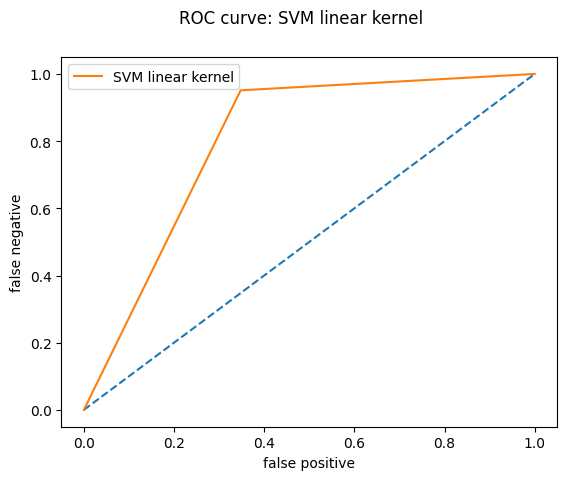

----------------------------------------------
The model  accuracy: 84 %
----------------------------------------------
The training time is:  17ms
----------------------------------------------
The f1 score is : 0.82
----------------------------------------------
The roc_auc_score is : 0.8
----------------------------------------------
The confusion matrix is :



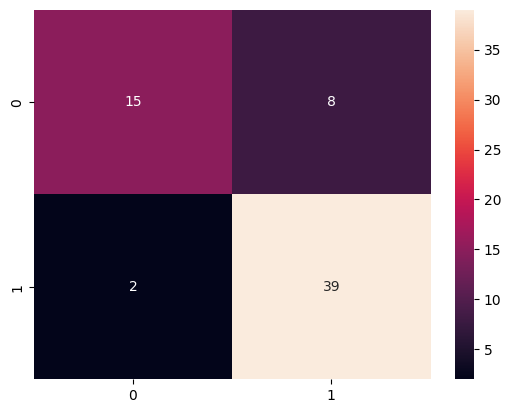

In [21]:
###################################################### Linear kernel ###########################################################
optimal_split_state1 = 0
maxAccuracy = 0
maxF1 = 0

# We already tune parameters, we do not need to loop over all the hyperparamters again, 
# if you want to do so just set max_iteration to 2000 for example 
# and remove the line 'optimal_split_state = 388628375' at the bottom of this cell.

max_iteration = 0
if max_iteration != 0:
    print ('----------------------------------------Hyperparameters tunning starts----------------------------------------\n\n')

for k in range(max_iteration):
    print ('Iteration :'+str(k)+', Current accuracy: '+str(maxAccuracy)+' Current f1 '+str(maxF1), end="\r")
    # Let's get the optimal C value for the linear kernal
    split_state = np.random.randint(1,1000000000)-1
    X_train,X_val,X_test,y_train,y_val,y_test = split(df,rest_size=0.4,test_size=0.4,randomState=split_state)
    optimal_C = optimal_C_value()


    # Now let's use the optimal C value
    linear_clf = SVC(C=optimal_C,kernel='linear')

    # Let's train the model with the optimal C value and calculate the training time
    tic = time()
    linear_clf.fit(X_train, y_train)
    toc = time()
    time1 = str(round(1000*(toc-tic))) + "ms"
    y_linear = linear_clf.predict(X_test)
    linear_f1 = f1_score(y_test, y_linear, average='macro')
    linear_accuracy = accuracy_score(y_test, y_linear)*100
    if linear_accuracy>maxAccuracy and linear_f1>maxF1:
        maxAccuracy = linear_accuracy
        maxF1 = linear_f1
        optimal_split_state1 = split_state
    if maxAccuracy>86 and maxF1>80:
        break;
        
# We've already tuned our hyperparameters, we will not repeat that again as it takes soo long. 
# The optimal split state for linear kernel is 388628375
# Let's try that split state 
optimal_split_state1 = 388628375
X_train,X_val,X_test,y_train,y_val,y_test = split(map_df,rest_size=0.4,test_size=0.4,randomState=optimal_split_state1)
optimal_C = optimal_C_value()


# Now let's use the optimal C value
linear_clf = SVC(C=optimal_C,kernel='linear')

# Let's train the model with the optimal C value and calculate the training time
tic = time()
linear_clf.fit(X_train, y_train)
toc = time()
time1 = str(round(1000*(toc-tic))) + "ms"
y_linear = linear_clf.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_linear)*100
if max_iteration != 0:
    print('\n\n\n                            ---------------------------process ended'\
         '------------------------------------                            \n\n\n')

# Let's show the resuls
showResults(linear_accuracy, time1, y_linear,'SVM linear kernel')